[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Ware_et_al_2025/fig_3_4.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Ware_et_al_2025/fig_3_4.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Ware_et_al_2025/fig_3_4.ipynb)

# Figs. 3 and 4 in [Ware et al. 2025](https://doi.org/10.48550/arXiv.2509.05536)

In [ ]:
import os, sys
os.environ['NUMBA_THREADING_LAYER'] = 'workqueue'  # PySDM & PyMPDATA don't work with TBB; OpenMP has extra dependencies on macOS
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples', 'PySDM')

In [ ]:
import os, sys
os.environ['NUMBA_THREADING_LAYER'] = 'workqueue'  # PySDM & PyMPDATA don't work with TBB; OpenMP has extra dependencies on macOS
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples', 'PySDM')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from PySDM.backends import CPU
from PySDM_examples.Ware_et_al_2025.example import run, Settings, SpectrumPlotter
from PySDM.initialisation.sampling.spectral_sampling import (
    ConstantMultiplicity,
    Logarithmic,
    Linear,
)
from open_atmos_jupyter_utils import show_plot
from cmap import Colormap
import matplotlib.colors as colors


/Users/emmaware/PySDM/PySDM/backends/numba.py:57: UserWarning: Disabling Numba threading due to ARM64 CPU (atomics do not work yet)
  warnings.warn(


dt=20, n_sd=13, exec_time=1.4281208750000003, it=0
dt=20, n_sd=13, exec_time=0.035834624999999676, it=1
dt=20, n_sd=13, exec_time=0.0358877909999995, it=2
dt=20, n_sd=13, exec_time=0.03575649999999975, it=3
dt=20, n_sd=13, exec_time=0.036703666999999385, it=4
dt=20, n_sd=13, exec_time=0.03681295799999962, it=5
dt=20, n_sd=13, exec_time=0.036125332999999316, it=6
dt=20, n_sd=13, exec_time=0.03658641700000054, it=7
dt=20, n_sd=13, exec_time=0.036137708000000046, it=8
dt=20, n_sd=13, exec_time=0.03544058299999975, it=9
dt=20, n_sd=13, exec_time=0.03639687499999944, it=10
dt=20, n_sd=13, exec_time=0.04002866699999963, it=11
dt=20, n_sd=13, exec_time=0.035491709000000426, it=12
dt=20, n_sd=13, exec_time=0.03620337500000037, it=13
dt=20, n_sd=13, exec_time=0.0364135000000001, it=14
dt=20, n_sd=13, exec_time=0.03699895799999986, it=15
dt=20, n_sd=13, exec_time=0.03632779099999972, it=16
dt=20, n_sd=13, exec_time=0.036196209000000756, it=17
dt=20, n_sd=13, exec_time=0.03555733299999986, it=18


KeyboardInterrupt: 

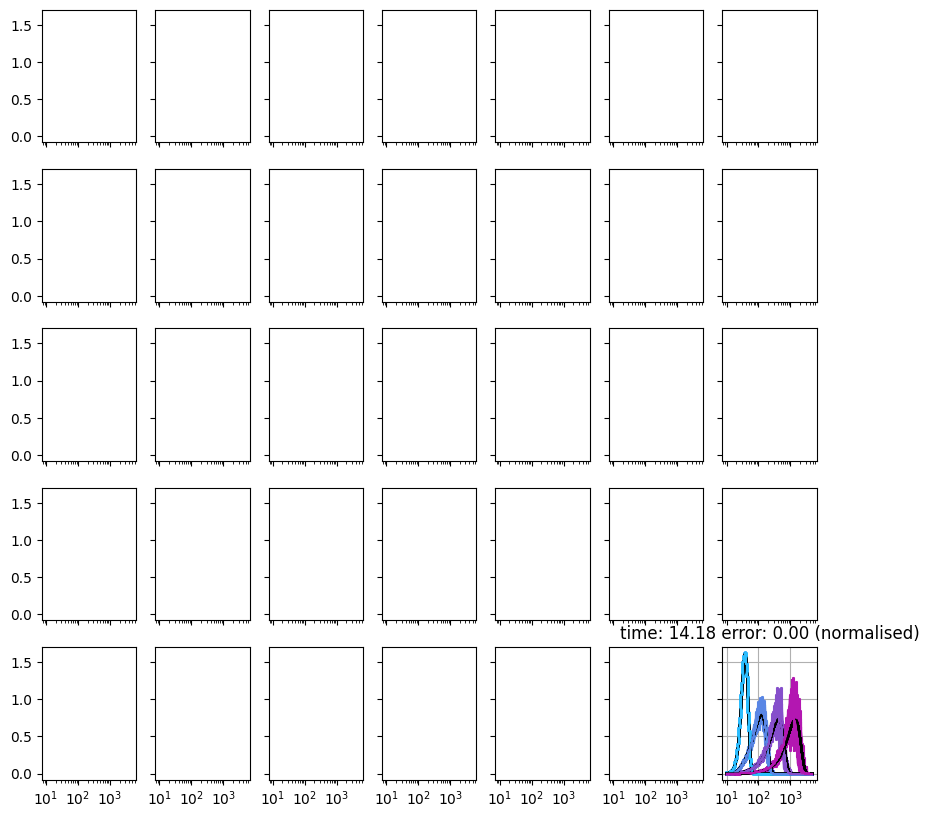

In [ ]:
backend = CPU()
n_sds = [13, 14, 15, 16, 17, 18, 19]
dts = [20, 10, 5, 2, 1]
sampling_strat = [ConstantMultiplicity, Logarithmic, Linear]
sampling_strat_names = ["ConstantMultiplicity", "Logarithmic", "Linear"]
output = {adaptive:{"ConstantMultiplicity": {}, "Logarithmic": {}, "Linear": {}} for adaptive in (False,True)}

iters_without_warmup = 30
base_time = None
base_error = None

plt.ioff()
fig, axs = plt.subplots(
    len(dts), len(n_sds), sharex=True, sharey=True, figsize=(10, 10)
)

error_heatmaps = {}
error_std_heatmaps = {}
deficit_heatmaps = {}
mean_time_heatmaps = {}
error_heatmaps_adaptive = {}
error_std_heatmaps_adaptive = {}
deficit_heatmaps_adaptive = {}
mean_time_heatmaps_adaptive = {}
one_for_warmup = 1


for adaptive in (False,True):
    for k, strat in enumerate(sampling_strat):
        error_heatmap = [[0 for _ in range(len(n_sds))] for _ in range(len(dts))]
        error_std_hm = [[0 for _ in range(len(n_sds))] for _ in range(len(dts))]
        deficit_heatmap = [[0 for _ in range(len(n_sds))] for _ in range(len(dts))]
        mean_time_heatmap = [[0 for _ in range(len(n_sds))] for _ in range(len(dts))]
        sanity_heatmap = [[0 for _ in range(len(n_sds))] for _ in range(len(dts))]
        plotter = SpectrumPlotter(Settings(), legend=False)
        plotter.smooth = False
        for i, dt in enumerate(dts):
            for j, n_sd in enumerate(n_sds):
                sanity_heatmap[i][j] = "dt=" + str(dt) + ", n_sd=" + str(n_sd)
                outputs = []
                deficits = []
                errors = []
                exec_times = []
                for it in range(iters_without_warmup + one_for_warmup):
                    settings = Settings()
                    backend.formulae.seed = it

                    settings.n_sd = 2**n_sd
                    settings.dt = dt
                    settings.adaptive = adaptive
                    settings.sampling = strat(settings.spectrum)

                    states, exec_time, deficit = run(settings, backend)
                    deficit *= settings.dv
                    print(f"{dt=}, {n_sd=}, {exec_time=}, {it=}")
                    if it != 0:
                        exec_times.append(exec_time)
                        outputs.append(states)
                        deficits.append(deficit)

                        for step, vals in states.items():
                            error = plotter.plot(vals, step * settings.dt)
                        errors.append(error * 1e-3)  # grams to kg
                mean_time = np.mean(exec_times[one_for_warmup:])
                if base_time is None:
                    base_time = mean_time
                norm_time = mean_time / base_time
                mean_output = {}
                for key in outputs[0].keys():
                    mean_output[key] = sum((output[key] for output in outputs)) / len(
                        outputs
                    )
                mean_deficit = sum(deficits) / len(deficits)
                last_step_error = sum(errors) / len(errors)
                error_std = np.std(errors)

                plotter.ylabel = (
                    r"$\bf{dt: "
                    + str(settings.dt)
                    + ("+ adaptivity" if settings.adaptive else "")
                    + "}$\ndm/dlnr [g/m^3/(unit dr/r)]"
                    if j == 0
                    else None
                )
                plotter.xlabel = (
                    "particle radius [µm]\n" + r"$\bf{n_{sd}: 2^{" + str(n_sd) + "}}$"
                    if i == len(dts) - 1
                    else None
                )
                plotter.title = (
                    f"time: {norm_time:.2f} error: {last_step_error:.2f} (normalised)"
                )
                error_heatmap[i][j] = last_step_error
                error_std_hm[i][j] = error_std
                deficit_heatmap[i][j] = mean_deficit
                mean_time_heatmap[i][j] = mean_time
                plotter.finished = False
                plotter.finish()
        output[adaptive][sampling_strat_names[k]]["Error"] = error_heatmap
        output[adaptive][sampling_strat_names[k]]["Error_std"] = error_std_hm
        output[adaptive][sampling_strat_names[k]]["Deficit"] = deficit_heatmap
        output[adaptive][sampling_strat_names[k]]["MeanTime"] = mean_time_heatmap
plt.clf()

regular_data, adaptive_data, log2_Ns, dts, init_names = output[False], output[True], n_sds, dts, sampling_strat_names


In [ ]:
global_droplets_norm_error = max(
    max(max(regular_data["ConstantMultiplicity"]["Error"])),
    max(max(regular_data["Logarithmic"]["Error"])),
    max(max(regular_data["Linear"]["Error"])),
)
global_droplets_norm_time = max(
    max(max(adaptive_data["ConstantMultiplicity"]["MeanTime"])),
    max(max(adaptive_data["Logarithmic"]["MeanTime"])),
    max(max(adaptive_data["Linear"]["MeanTime"])),
)


# %%
fig, axes = plt.subplot_mosaic(
    [
        [init + "_Error" for init in init_names],
        [init + "_MeanTime" for init in init_names],
        [init + "_Deficit" for init in init_names],
    ],
    sharex=True,
    sharey=True,
    figsize=(8, 4),
    constrained_layout=True,
)

vminmx = {
    "Error": [
        np.min([regular_data[i]["Error"] for i in init_names]),
        np.max([regular_data[i]["Error"] for i in init_names]),
    ],
    "MeanTime": [
        np.min([regular_data[i]["MeanTime"] for i in init_names]),
        np.max([regular_data[i]["MeanTime"] for i in init_names]),
    ],
    "Deficit": [1, np.max([regular_data[i]["Deficit"] for i in init_names])],
}
mult = {
    "Error": 1e3,
    "MeanTime": 1 / vminmx["MeanTime"][1],
    "Deficit": 1,
}
labels = {
    "Error": f"RMSE at t=3600s\n[g/m$^3$/unit ln(r)]",
    "MeanTime": "WallTime \n normalized",
    "Deficit": "Collision Deficit\n$[s^{{-1}} m^{{-3}}$]",
}
init_naming = {
    "ConstantMultiplicity": "constant-multiplicity",
    "Logarithmic": "uniform-in-log($r$)",
    "Linear": "uniform-in-$r$",
}
cticks = {
    "Error": np.linspace(0, 0.15, 4),
    "MeanTime": np.linspace(0, 1, 5),
    "Deficit": np.logspace(0, 6, 7),
}


for row in ["Error", "MeanTime", "Deficit"]:
    vmin = vminmx[row][0] * mult[row]
    vmax = vminmx[row][1] * mult[row]

    for init in init_names:
        ax = axes[f"{init}_{row}"]
        data = np.array(regular_data[init][row])
        data = np.where(data == 0, np.nan, data) * mult[row]
        bounds = (
            np.linspace(vmin, vmax, 20)
            if row != "Deficit"
            else np.logspace(np.log10(vmin), np.log10(vmax), 20)
        )
        norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

        im = ax.imshow(
            data,
            norm=norm,
            cmap=plt.get_cmap(Colormap("crameri:oslo_r").to_mpl(), 10),
            aspect="auto",
        )
        if init == init_names[0]:
            cbar = fig.colorbar(
                im,
                ax=axes[f"{init_names[-1]}_{row}"],
                orientation="vertical",
                aspect=5,
                label=labels[row],
                ticks=cticks[row],
                format="%.2f",
            )
            cbar.ax.yaxis.set_offset_position("left")
            (
                cbar.ax.set_yticklabels(
                    [f"$10^{{{int(np.log10(a))}}}$" for a in cticks[row]]
                )
                if row == "Deficit"
                else None
            )

        ax.invert_yaxis()
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(1)
            spine.set_color("black")

        if row == "Error":
            ax.set_title(f"{init_naming[init]}")
        if row == "Deficit":
            ax.set_xlabel("$N_s$")
        if init == init_names[0]:
            ax.set_ylabel(f"$\Delta t$ [s]")
        ax.set_xticks(np.arange(len(log2_Ns)))
        ax.set_xticklabels([f"$2^{{{n}}}$" for n in log2_Ns])
        ax.set_yticks(np.arange(len(dts)))
        ax.set_yticklabels(dts, rotation=0)

    cbar.set_label(labels[row])
show_plot("fig_3")


fig, axes = plt.subplot_mosaic(
    [
        [init + "_Error" for init in init_names],
        [init + "_MeanTime" for init in init_names],
    ],
    sharex=True,
    sharey=True,
    figsize=(8, 3),
    constrained_layout=True,
)
for row in ["Error", "MeanTime"]:
    vmin = vminmx[row][0] * mult[row]
    vmax = vminmx[row][1] * mult[row]

    for init in init_names:
        ax = axes[f"{init}_{row}"]
        data = np.array(adaptive_data[init][row])
        data = np.where(data == 0, np.nan, data) * mult[row]

        bounds = np.linspace(vmin, vmax, 20)
        norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

        contour = ax.imshow(
            data,
            norm=norm,
            cmap=plt.get_cmap(Colormap("crameri:oslo_r").to_mpl(), 20),
            aspect="auto",
        )
        ax.invert_yaxis()

        if init == init_names[0]:
            cbar = fig.colorbar(
                contour,
                ax=axes[f"{init_names[-1]}_{row}"],
                orientation="vertical",
                aspect=5,
                # pad=0.1,
                label=labels[row],
                ticks=cticks[row],
                format="%.2f",
            )
            cbar.ax.yaxis.set_offset_position("left")

        if row == "Error":
            ax.set_title(f"{init_naming[init]}")
        if row == "MeanTime":
            ax.set_xlabel("$N_s$")
        if init == init_names[0]:
            ax.set_ylabel(f"$\Delta t$ [s]")
        ax.set_xticks(np.arange(len(log2_Ns)))
        ax.set_xticklabels([f"$2^{{{n}}}$" for n in log2_Ns])
        ax.set_yticks(np.arange(len(dts)))
        ax.set_yticklabels(dts)
show_plot("fig_4")

